# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Advanced Deep Learning
## Topic   : Semantic Segmentation using UNET_ TGS multi

#### Connect to Kaggle

Data is available on Kaggle website. We will first connect Colab to Kaggle. Instructions for downloading kaggle data to Colab can be found [in this post](https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463).

In [1]:
!pip install kaggle --quiet

In [2]:
#Make a directory for Kaggle
!mkdir .kaggle

In [3]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 May  6 13:44 sample_data


In [4]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
#Copy kaggle.json file. Change gdrive folder based on where you have saved your json file from Kaggle
!cp '/gdrive/My Drive/kaggle.json' /content/.kaggle/kaggle.json

In [6]:
#Check if json file is there
!ls -l /content/.kaggle

total 4
-rw------- 1 root root 66 May 30 16:43 kaggle.json


In [7]:
!mkdir ~/.kaggle

In [8]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [9]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [10]:
!chmod 600 /root/.kaggle/kaggle.json

Verify Kaggle connection

In [11]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-29 17:43:56           6314  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3618  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1256  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1999  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

#### Download TGS Dataset

Here is the [link](https://www.kaggle.com/c/tgs-salt-identification-challenge/data) for TGS Salt identification competition. You may need to agree to the rules of the competition before download is allowed.

In [12]:
#Download data from Kaggle for TGS Salt and copy it to /content folder
!kaggle competitions download -c tgs-salt-identification-challenge -p /content

 97% 159M/163M [00:01<00:00, 88.3MB/s]
100% 163M/163M [00:01<00:00, 108MB/s] 
 48% 20.0M/41.4M [00:00<00:00, 34.6MB/s]
100% 41.4M/41.4M [00:00<00:00, 105MB/s] 
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 130MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 107MB/s]
 66% 25.0M/37.9M [00:00<00:00, 37.7MB/s]
100% 37.9M/37.9M [00:00<00:00, 96.0MB/s]
 98% 213M/217M [00:01<00:00, 119MB/s] 
100% 217M/217M [00:01<00:00, 120MB/s]
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 102MB/s]


In [13]:
!ls -l

total 471768
-rw-r--r-- 1 root root 227132081 May 30 16:43 competition_data.zip
-rw-r--r-- 1 root root    329525 May 30 16:43 depths.csv
-rw-r--r-- 1 root root  43373216 May 30 16:43 flamingo.zip
drwxr-xr-x 1 root root      4096 May  6 13:44 sample_data
-rw-r--r-- 1 root root    270012 May 30 16:43 sample_submission.csv
-rw-r--r-- 1 root root 171262199 May 30 16:43 test.zip
-rw-r--r-- 1 root root    943702 May 30 16:43 train.csv
-rw-r--r-- 1 root root  39757560 May 30 16:43 train.zip


In [14]:
#unzip training data
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/d80ead8703.png   
  inflating: images/b012e9ebb0.png   
  inflating: images/d3034e7a60.png   
  inflating: images/ae2ef70d51.png   
  inflating: images/1af44a9db0.png   
  inflating: images/41cfd4b320.png   
  inflating: images/853e89d0d3.png   
  inflating: images/2a484baa26.png   
  inflating: images/92e617896e.png   
  inflating: images/b70f0ab0c2.png   
  inflating: images/e8757626a1.png   
  inflating: images/6a3d92ce59.png   
  inflating: images/127ef4105f.png   
  inflating: images/d21012f5c1.png   
  inflating: images/1cb9549d2c.png   
  inflating: images/e030bdae65.png   
  inflating: images/0cf7155eb6.png   
  inflating: images/badb3ea766.png   
  inflating: images/9bd58061d6.png   
  inflating: images/2b1e71c2a3.png   
  inflating: images/28d42de29f.png   
  inflating: images/10833853b3.png   
  inflating: images/ef13247eed.png   
  inflating: images/bce104494c.png   
  inflating: images/c8ce151a18.png   

In [15]:
!ls -l

total 472032
-rw-r--r-- 1 root root 227132081 May 30 16:43 competition_data.zip
-rw-r--r-- 1 root root    329525 May 30 16:43 depths.csv
-rw-r--r-- 1 root root  43373216 May 30 16:43 flamingo.zip
drwxr-xr-x 2 root root    135168 Jul 16  2018 images
drwxr-xr-x 2 root root    135168 Jul 16  2018 masks
drwxr-xr-x 1 root root      4096 May  6 13:44 sample_data
-rw-r--r-- 1 root root    270012 May 30 16:43 sample_submission.csv
-rw-r--r-- 1 root root 171262199 May 30 16:43 test.zip
-rw-r--r-- 1 root root    943702 May 30 16:43 train.csv
-rw-r--r-- 1 root root  39757560 May 30 16:43 train.zip


In [16]:
!ls -l images

total 45544
-rw-r--r-- 1 root root  8663 Jul 16  2018 000e218f21.png
-rw-r--r-- 1 root root  8932 Jul 16  2018 003c477d7c.png
-rw-r--r-- 1 root root 13271 Jul 16  2018 00441f1cf2.png
-rw-r--r-- 1 root root  7872 Jul 16  2018 0050766ae2.png
-rw-r--r-- 1 root root  8086 Jul 16  2018 005b452274.png
-rw-r--r-- 1 root root  8779 Jul 16  2018 0061281eea.png
-rw-r--r-- 1 root root 11270 Jul 16  2018 008a50a2ec.png
-rw-r--r-- 1 root root 12883 Jul 16  2018 00950d1627.png
-rw-r--r-- 1 root root 12803 Jul 16  2018 00a3af90ab.png
-rw-r--r-- 1 root root 11257 Jul 16  2018 00cda0328c.png
-rw-r--r-- 1 root root  8154 Jul 16  2018 0108518d1e.png
-rw-r--r-- 1 root root  6499 Jul 16  2018 010ee525b6.png
-rw-r--r-- 1 root root  8201 Jul 16  2018 0115703825.png
-rw-r--r-- 1 root root  7714 Jul 16  2018 01323211a0.png
-rw-r--r-- 1 root root  8778 Jul 16  2018 016fc8031c.png
-rw-r--r-- 1 root root  8300 Jul 16  2018 019afb4b4e.png
-rw-r--r-- 1 root root  6362 Jul 16  2018 01b5362cce.png
-rw-r--r-- 1 root r

In [17]:
!ls -l masks

total 16000
-rw-r--r-- 1 root root  89 Jul 16  2018 000e218f21.png
-rw-r--r-- 1 root root 194 Jul 16  2018 003c477d7c.png
-rw-r--r-- 1 root root  89 Jul 16  2018 00441f1cf2.png
-rw-r--r-- 1 root root  89 Jul 16  2018 0050766ae2.png
-rw-r--r-- 1 root root  89 Jul 16  2018 005b452274.png
-rw-r--r-- 1 root root 339 Jul 16  2018 0061281eea.png
-rw-r--r-- 1 root root 145 Jul 16  2018 008a50a2ec.png
-rw-r--r-- 1 root root 207 Jul 16  2018 00950d1627.png
-rw-r--r-- 1 root root 130 Jul 16  2018 00a3af90ab.png
-rw-r--r-- 1 root root  89 Jul 16  2018 00cda0328c.png
-rw-r--r-- 1 root root 351 Jul 16  2018 0108518d1e.png
-rw-r--r-- 1 root root  89 Jul 16  2018 010ee525b6.png
-rw-r--r-- 1 root root 213 Jul 16  2018 0115703825.png
-rw-r--r-- 1 root root 487 Jul 16  2018 01323211a0.png
-rw-r--r-- 1 root root  89 Jul 16  2018 016fc8031c.png
-rw-r--r-- 1 root root 460 Jul 16  2018 019afb4b4e.png
-rw-r--r-- 1 root root 317 Jul 16  2018 01b5362cce.png
-rw-r--r-- 1 root root 240 Jul 16  2018 01c033e116.pn

Images and Masks are unzipped

In [18]:
!ls -l images | wc -l

4001


In [19]:
!ls -l masks | wc -l

4001


#### Visualizing Data

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import PIL

Read training images and build a dataframe with IDs

In [21]:
df = pd.read_csv('train.csv')
df.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [22]:
df.shape

(4000, 2)

Split training data into training and test

In [23]:
idx = np.random.rand(len(df)) < 0.8
test_df = df[~idx]
train_df = df[idx]
test_df.reset_index(inplace=True)
train_df.reset_index(inplace=True)

In [24]:
train_df.shape, test_df.shape

((3174, 3), (826, 3))

In [31]:
def display_seismic_data(img_num, df):

    #Create a pyplot with two images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))

    #Read Seismic image and corresponding mask
    seismic_img = tf.keras.preprocessing.image.load_img('images/' + df.loc[img_num, 'id'] + '.png', color_mode='grayscale')

    mask_img = tf.keras.preprocessing.image.load_img('masks/' + df.loc[img_num, 'id'] + '.png', color_mode='grayscale')
    
    #Show both images
    ax1.set_title('Seismic')
    ax1.imshow(seismic_img, cmap = 'gray', interpolation = 'bilinear')
    ax1.axis('off')
    ax2.set_title('Salt')
    ax2.imshow(mask_img, cmap = 'gray', interpolation = 'bilinear')
    ax2.axis('off')
    plt.show()

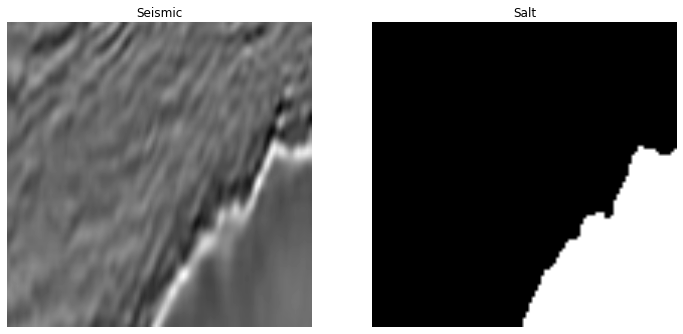

In [43]:
#Try random images
img_num = np.random.randint(0, train_df.shape[0])
display_seismic_data(img_num, train_df)

#### Build Batch Generator

In [44]:
img_size = 128
num_classes = 2

In [45]:
def batch_generator(df, batch_size=32):

    while True:

        #Create random indexes
        idx = np.random.randint(0, df.shape[0], batch_size)

        #Initialize numpy arrays for X and y
        #Input image is size img_size,img_size,1
        X = np.zeros((batch_size, img_size, img_size,1))
        #Mask's size is img_size, img_size, 1
        y = np.zeros((batch_size, img_size, img_size,num_classes))

        #Populate X and y with actual data
        for i in range(len(idx)):

            #Read image
            img = tf.keras.preprocessing.image.load_img('images/' + df.loc[idx[i],'id'] + '.png', color_mode='grayscale',
                                                        target_size=(img_size, img_size))
            img = tf.keras.preprocessing.image.img_to_array(img).astype('uint8')/255.0

            X[i] = img

            #Read mask
            mask_img = tf.keras.preprocessing.image.load_img('masks/' + df.loc[idx[i],'id'] + '.png',
                                                            color_mode = 'grayscale',
                                                            target_size=(img_size, img_size))
            mask_img = tf.keras.preprocessing.image.img_to_array(mask_img).astype('uint8')/255.0
            #One hot encoding
            mask_img = tf.keras.utils.to_categorical(mask_img, num_classes=num_classes)

            y[i] = mask_img

        yield X, y

In [46]:
a = batch_generator(df, batch_size=2)

In [47]:
x, y = next(a)

In [48]:
x.shape

(2, 128, 128, 1)

In [49]:
y.shape

(2, 128, 128, 2)

In [50]:
np.unique(y[0])

array([0., 1.])

#### Build Model

Function to create two Convolutional layer block

In [51]:
def conv2d_block(input_tensor, n_filters):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # second layer
    x = tf.keras.layers.Conv2D(n_filters, (3,3), kernel_initializer = 'he_normal', padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

Function to build UNET Architecture

In [52]:
def build_unet(input_img, n_filters=16, dropout=0.1):

    #ENCODER - DOWNSAMPLE the image - 128x128x1

    #First Block
    c1 = conv2d_block(input_img, n_filters*1) #128x128x16
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1) #64x64x16
    p1 = tf.keras.layers.Dropout(dropout)(p1) #64x64x16
    #output will be 64x64x16 for image size 128x128x1

    #Second Block
    c2 = conv2d_block(p1, n_filters*2) #64x64x32
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2) #32x32x32
    p2 = tf.keras.layers.Dropout(dropout)(p2)
    #output will be 32x32x32

    #Third Block
    c3 = conv2d_block(p2, n_filters*4) #32x32x64
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3) #16x16x64
    p3 = tf.keras.layers.Dropout(dropout)(p3)
    #output will be 16x16x64

    #Fourth Block
    c4 = conv2d_block(p3, n_filters*8) #16x16x128
    p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)
    p4 = tf.keras.layers.Dropout(dropout)(p4)
    ##output will be 8x8x128 

    #Fifth Block
    c5 = conv2d_block(p4, n_filters*16)
    #output will be 8x8x256

    #We now have output of Encoder

    #DECODER - UPSAMPLE the feature to generate mask

    #First Block - connected to fourth block on DOWNSAMPLE side
    u6 = tf.keras.layers.Conv2DTranspose(n_filters * 8, (3, 3), 
                                         strides = (2, 2), 
                                         padding = 'same')(c5) #16x16x128
    #Skip connection
    u6 = tf.keras.layers.concatenate([u6, c4]) #16x16x256
    u6 = tf.keras.layers.Dropout(dropout)(u6) 
    c6 = conv2d_block(u6, n_filters * 8) #16x16x128

    #Second Block - connected to third block on DOWNSAMPLE side
    u7 = tf.keras.layers.Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6) #32x32x64
    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4)

    #Third Block - connected to second block on DOWNSAMPLE side
    u8 = tf.keras.layers.Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7) #64x64x32
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2) 

    #Fourth Block - connected to first block on DOWNSAMPLE side
    u9 = tf.keras.layers.Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8) #128x128x16
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1) #128 x 128 x 16

    #Build the Output layer
    outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='softmax')(c9) #128x128x2

    #Build the model using different layers
    model = tf.keras.Model(inputs=[input_img], outputs=[outputs])
    return model

Build UNET model

In [53]:
#Clear out notebook session
tf.keras.backend.clear_session()

#Define input layer
input_img = tf.keras.layers.Input((img_size, img_size, 1), name='input_img')

#Build model
model = build_unet(input_img, dropout=.3)

#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         input_img[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Build training and test batch generators

In [55]:
train_generator = batch_generator(train_df,batch_size=32)
test_generator = batch_generator(test_df, batch_size=32)

Train the model

In [56]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('TGS_v1.h5', save_best_only=True, monitor='val_accuracy', verbose=1)

In [57]:
model.fit(train_generator,
          steps_per_epoch=train_df.shape[0]//32, 
          validation_data=test_generator, 
          validation_steps=test_df.shape[0]//32, 
          callbacks=[model_checkpoint],
          epochs=10)

Epoch 1/10
99/99 [==============================] - 45s 115ms/step - loss: 0.6446 - accuracy: 0.6539 - val_loss: 0.7089 - val_accuracy: 0.4626

Epoch 00001: val_accuracy improved from -inf to 0.46258, saving model to TGS_v1.h5
Epoch 2/10
99/99 [==============================] - 11s 110ms/step - loss: 0.4265 - accuracy: 0.8268 - val_loss: 1.6188 - val_accuracy: 0.3139

Epoch 00002: val_accuracy did not improve from 0.46258
Epoch 3/10
99/99 [==============================] - 11s 111ms/step - loss: 0.3626 - accuracy: 0.8572 - val_loss: 2.0003 - val_accuracy: 0.3228

Epoch 00003: val_accuracy did not improve from 0.46258
Epoch 4/10
99/99 [==============================] - 11s 112ms/step - loss: 0.3323 - accuracy: 0.8702 - val_loss: 0.8364 - val_accuracy: 0.6327

Epoch 00004: val_accuracy improved from 0.46258 to 0.63270, saving model to TGS_v1.h5
Epoch 5/10
99/99 [==============================] - 11s 112ms/step - loss: 0.3045 - accuracy: 0.8790 - val_loss: 0.3626 - val_accuracy: 0.8181

E

In [58]:
model = tf.keras.models.load_model('/gdrive/My Drive/Advanced Computer Vision AIML/Semantic Segmentation/TGS_v1.h5')
model = tf.keras.models.load_model('TGS_v1.h5')

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         input_img[0][0]                  
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 128, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

#### Model Prediction

In [64]:
def display_model_prediction(img_num, df):

    #Read Seismic image and corresponding mask
    seismic_img = tf.keras.preprocessing.image.load_img('images/' + df.loc[img_num, 'id'] + '.png', color_mode='grayscale')
    mask_img = tf.keras.preprocessing.image.load_img('masks/' + df.loc[img_num, 'id'] + '.png', color_mode='grayscale')

    #Model prediction
    test_img = seismic_img.resize((img_size, img_size))
    test_img = tf.keras.preprocessing.image.img_to_array(test_img).astype('uint8')/255.0
    test_img = np.expand_dims(test_img, axis=0) #1,128,128,1

    pred = model.predict(test_img) #1,128,128,num_classes
    
    predicted_classes = np.argmax(pred[0], axis=-1)
    
    #Create a pyplot with two images
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 8))

    #Show both images
    ax1.set_title('Seismic')
    ax1.imshow(seismic_img.resize((img_size, img_size)), cmap = 'gray', interpolation = 'bilinear')
    ax2.set_title('Actual Salt')
    ax2.imshow(mask_img.resize((img_size, img_size)), cmap = 'gray', interpolation = 'bilinear')
    ax3.set_title('Predicted Salt')
    ax3.imshow(np.reshape(predicted_classes,(img_size, img_size)), cmap = 'gray', interpolation = 'bilinear')


    plt.show()

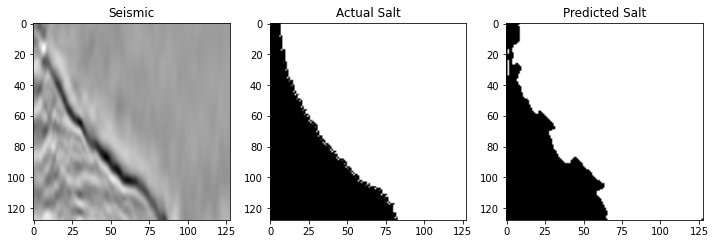

In [78]:
img_num = np.random.randint(0, test_df.shape[0])
display_model_prediction(img_num, test_df)